For a particular model --> for a selected fold -->
- From the top 500 samples in the json: correctly predicted set and incorrectly predicted set
- From the bottom 500 samples in the json: correctly predicted set and incorrectly predicted set

For the obtained 4 sets, plot graphs for average disagreement (lime vs shap, lime vs global, shap vs global) for each compactor.

In [1]:
# Import libraries
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import random
import json
from typing import Union
import numpy as np
from disagreement import Disagreement

In [2]:
from compactor.MaxNonActivatedCompactor import MaxNonActivatedCompactor
from compactor.ActivatedCompactor import ActivatedCompactor
from compactor.MaxCompactor import MaxCompactor

In [3]:
main_path = "/storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/code/"

json_file_path = main_path + "model_outputs_6/xai_results/all_exp.json"
model_path = main_path + "model_outputs/artifacts/random_forest_t_300_md_10/" + "random_forest_t_300_md_10_fold_1_2016-01-07.pkl"
predictions_file_path = main_path + "model_outputs/artifacts/random_forest_t_300_md_10/test_prediction_fold_1_2016-01-07.csv"
processed_data_path = main_path + "processed_data/processed_final_data_latest.csv"

fold = 'fold0'

In [4]:
categorical_cols = ["Project Type", "Project Subject Category Tree", "Project Subject Subcategory Tree",
                    "Project Grade Level Category", "Project Resource Category", "School Metro Type",
                    "School State", "Teacher Prefix",
                    ]

In [2]:
!ls /storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/code/model_outputs/artifacts/logistic_regression_mi_100_p_l1/

logistic_regression_mi_100_p_l1_fold_1_2016-01-07.pkl
logistic_regression_mi_100_p_l1_fold_2_2015-09-09.pkl
logistic_regression_mi_100_p_l1_fold_3_2015-05-12.pkl
logistic_regression_mi_100_p_l1_fold_4_2015-01-12.pkl
logistic_regression_mi_100_p_l1_fold_5_2014-09-14.pkl
logistic_regression_mi_100_p_l1_fold_6_2014-05-17.pkl
test_prediction_fold_1_2016-01-07.csv
test_prediction_fold_2_2015-09-09.csv
test_prediction_fold_3_2015-05-12.csv
test_prediction_fold_4_2015-01-12.csv
test_prediction_fold_5_2014-09-14.csv
test_prediction_fold_6_2014-05-17.csv


In [5]:
# Load predictions - To get the predicted label
predictions = pd.read_csv(predictions_file_path)
predictions.head()

,Unnamed: 0,Project ID,1,Start Date
0,54,102f47610669fc10a9742ef95bfe21a8,0.347448,2016-01-07
1,67,918a8b2f88d1016c98506780c92ca2ef,0.352459,2016-01-07
2,73,3b2a53dad2bbfa3a6e8a70a8614f3794,0.425271,2016-01-07
3,98,9efe5e053be0b42ae131de6e128253f4,0.347134,2016-01-07
4,138,964f3a78df08d5e78943f6941982be39,0.280771,2016-01-07


In [6]:
# Read dataframe to get actual label and for the categorical columns
processed = pd.read_csv(processed_data_path)
processed.columns

Index(['Unnamed: 0', 'Project ID', 'Project Posted Date', 'Project Type',
       'Project Posted Month', 'Project Subject Category Tree', 'Project Cost',
       'Project Subject Subcategory Tree', 'Project Grade Level Category',
       'Project Resource Category', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'Teacher Prefix',
       'Teacher Project Posted Sequence', 'Label', 'Teacher Success Rate',
       'Teacher Success Rate Imputed', 'School City Success Rate',
       'School City Success Rate Imputed', 'School Success Rate',
       'School Success Rate Imputed', 'School County Success Rate',
       'School County Success Rate Imputed', 'Project Count in State'],
      dtype='object')

In [7]:
# Load explanations
explanations = json.load(open(json_file_path))

In [8]:
# Create two dictionaries for correct predictions (top and bottom) and wrong predictions
correct_predictions = {
        'lime': {
            'top': {},
            'bottom': {}
        },
        'treeshap': {
            'top': {},
            'bottom': {}
        }
    }
incorrect_predictions = {
        'lime': {
            'top': {},
            'bottom': {}
        },
        'treeshap': {
            'top': {},
            'bottom': {}
        }
    }


top_keys = list(explanations[fold]['lime']['top'])
bottom_keys = list(explanations[fold]['lime']['bottom'])

# For correct prediction, true label must be 1
for key in top_keys:
    true_label = processed.loc[processed['Project ID'] == key]['Label'].item()
    lime_exp = explanations[fold]['lime']['top'][key]
    treeshap_exp = explanations[fold]['treeshap']['top'][key]
    
    if(true_label == 1):
        print(f"correct prediction {true_label}")
        correct_predictions['lime']['top'][key] = lime_exp
        correct_predictions['treeshap']['top'][key] = treeshap_exp
        
    else:
        print(f"incorrect prediction {true_label}")
        incorrect_predictions['lime']['top'][key] = lime_exp
        incorrect_predictions['treeshap']['top'][key] = treeshap_exp



# For correct prediction, true label must be 0
for key in bottom_keys:
    true_label = processed.loc[processed['Project ID'] == key]['Label'].item()
    lime_exp = explanations[fold]['lime']['bottom'][key]
    treeshap_exp = explanations[fold]['treeshap']['bottom'][key]
    
    if(true_label == 0):
        print(f"correct prediction {true_label}")
        correct_predictions['lime']['bottom'][key] = lime_exp
        correct_predictions['treeshap']['bottom'][key] = treeshap_exp
        
    else:
        print(f"incorrect prediction {true_label}")
        incorrect_predictions['lime']['bottom'][key] = lime_exp
        incorrect_predictions['treeshap']['bottom'][key] = treeshap_exp



correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
incorrect prediction 0
correct prediction 1
correct prediction 1
correct prediction 1
incorrect prediction 0
incorrect prediction 0
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
incorrect prediction 0
incorrect prediction 0
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
incorrect prediction 0
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
incorrect prediction 0
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
correct prediction 1
incorrect prediction 0
correct prediction

In [9]:
print(f"Top list: correct - {len(list(correct_predictions['lime']['top'].keys()))}, incorrect - {len(list(incorrect_predictions['lime']['top'].keys()))}")
print(f"Bottom list: correct - {len(list(correct_predictions['lime']['bottom'].keys()))}, incorrect - {len(list(incorrect_predictions['lime']['bottom'].keys()))}")


Top list: correct - 376, incorrect - 124
Bottom list: correct - 465, incorrect - 35


In [16]:
# For testing
# Check disagreement for a single explanation in top correct with activated compactor
disagreement = Disagreement(correct_predictions["treeshap"]["top"]["cdc83b2eb031d999c123535bf09d24a0"], correct_predictions["lime"]["top"]["cdc83b2eb031d999c123535bf09d24a0"])

activated_features = {}
for feature in categorical_cols:
    activated_features[feature] = f"{feature}_{processed[processed['Project ID'] == 'cdc83b2eb031d999c123535bf09d24a0' ][feature].values[0]}"

activated_compactor = ActivatedCompactor(activated_features)
disagreement.compact_features(activated_compactor)
disagreement.get_disagreement(23, None)

{'feature_agreement': 0.9130434782608695,
 'rank_agreement': 0.30434782608695654,
 'sign_agreement': 0.8695652173913043,
 'signed_rank_agreement': 0.30434782608695654}

Calculating the average disagreement

1. LIME vs SHAP

In [10]:
def disagreement_average(explanations1: dict , explanations2: dict , k: int, features_F: list , method = None, raw_data = None, debug = False) -> dict:
    
    disagreement_mean = {'feature_agreement': 0.0,
     'rank_agreement': 0.0,
     'sign_agreement': 0.0,
     'signed_rank_agreement': 0.0}
    
    for project_id in explanations1.keys():
        if debug:
            print(f"******************Project ID: {project_id}************************")
        
        if len(explanations1[project_id]) < k:
            raise ValueError(f"K should be less than {len(explanations1[project_id])}")
        
        disagreement_calc_2 = Disagreement(explanations1[project_id], explanations2[project_id])
        
        if debug:
            print("Initial Explanation 1 \n",disagreement_calc_2.sorted_explanation1[:k])
            print("Initial Explanation 2 \n",disagreement_calc_2.sorted_explanation2[:k])
            
        if method=="max":
            max_compactor = MaxCompactor(categorical_cols)
            disagreement_calc_2.compact_features(max_compactor)
            
            
        elif method == "activated" and raw_data is not None:
            activated_features = {}
            for feature in categorical_cols:
                activated_features[feature] = f"{feature}_{raw_data[raw_data['Project ID'] == project_id ][feature].values[0]}"
            activated_compactor = ActivatedCompactor(activated_features)
            disagreement_calc_2.compact_features(activated_compactor)
            
        elif method == "maxnonactivated" and raw_data is not None:
            activated_features = {}
            for feature in categorical_cols:
                activated_features[feature] = f"{feature}_{raw_data[raw_data['Project ID'] == project_id ][feature].values[0]}"
            max_non_activated_compactor = MaxNonActivatedCompactor(activated_features)
            disagreement_calc_2.compact_features(max_non_activated_compactor)
            
        if debug:
            print("After Compact Explanation 1 \n",disagreement_calc_2.sorted_explanation1[:k])
            print("After Compact Explanation 2 \n",disagreement_calc_2.sorted_explanation2[:k])
            
            
        disagreement = disagreement_calc_2.get_disagreement(k, features_F)
        
        if debug:
            print("Disagreement : ", disagreement)
        
        for key in list(disagreement_mean.keys()):
            if disagreement[key] == None:
                raise ValueError(f"The value for key '{key}' in disagreement_mean is None.")
            disagreement_mean[key] += disagreement[key]
        
        if debug:
            print("****************************************")

    for key in list(disagreement_mean.keys()):
        disagreement_mean[key] = round(disagreement_mean[key] / len(explanations1.keys()),3)
    
    if debug:
        print("*********************************************")
        print(disagreement_mean)
        print("*********************************************")

    
    return disagreement_mean

In [11]:
def disagreement_for_exp_dict(explanations, k_range, method=None, raw_data=None, debug=False):
    
    disagreement_mean_across_top = {'feature_agreement': [],
         'rank_agreement': [],
         'sign_agreement': [],
         'signed_rank_agreement': []}

    for i in range(1,k_range+1,1):
        explanations_lime = disagreement_average(explanations["lime"]["top"], explanations["treeshap"]["top"], i, None, method, raw_data,  debug)

        for key in list(disagreement_mean_across_top.keys()):
            disagreement_mean_across_top[key].append(explanations_lime[key])

    disagreement_mean_across_bottom = {'feature_agreement': [],
         'rank_agreement': [],
         'sign_agreement': [],
         'signed_rank_agreement': []}

    for i in range(1,k_range+1,1):
        explanations_lime = disagreement_average(explanations["lime"]["bottom"], explanations["treeshap"]["bottom"], i, None,method, raw_data, debug)

        for key in list(disagreement_mean_across_bottom.keys()):
            disagreement_mean_across_bottom[key].append(explanations_lime[key])

    return disagreement_mean_across_top, disagreement_mean_across_bottom

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct, disagreement_mean_across_bottom_correct, disagreement_mean_across_top_incorrect, disagreement_mean_across_bottom_incorrect, feature_n):

    feature_range = range(1, feature_n+1, 1)

    # Create separate subplots for each agreement metric
    fig, axs = plt.subplots(4, 1, figsize=(10, 16))

    # Plot Feature Agreement for top k
    axs[0].plot(feature_range, disagreement_mean_across_top_correct["feature_agreement"], label='Feature Agreement (Top - Correct Predictions)', marker='o', color='b')
    axs[0].plot(feature_range, disagreement_mean_across_bottom_correct["feature_agreement"], label='Feature Agreement (Bottom - Correct Predictions)', linestyle='--', marker='o', color='r')
    axs[0].plot(feature_range, disagreement_mean_across_top_incorrect["feature_agreement"], label='Feature Agreement (Top - Incorrect Predictions)', marker='o', color='#ee82ee')
    axs[0].plot(feature_range, disagreement_mean_across_bottom_incorrect["feature_agreement"], label='Feature Agreement (Bottom - Incorrect Prediction)', linestyle='--', marker='o', color='#6a5acd')
    axs[0].set_xlabel('Number of Features (Top K)')
    axs[0].set_ylabel('Agreement Score')
    axs[0].set_title('Feature Agreement vs. Number of Features (Top K)')
    axs[0].legend()
    axs[0].grid(True)

    # Plot Rank Agreement for top k
    axs[1].plot(feature_range, disagreement_mean_across_top_correct["rank_agreement"], label='Rank Agreement (Top - Correct Predictions)', marker='s', color='g')
    axs[1].plot(feature_range, disagreement_mean_across_bottom_correct["rank_agreement"], label='Rank Agreement (Bottom - Correct Predictions)', linestyle='--', marker='s', color='m')
    axs[1].plot(feature_range, disagreement_mean_across_top_incorrect["rank_agreement"], label='Rank Agreement (Top - Incorrect Predictions)', marker='s', color='#3cb371')
    axs[1].plot(feature_range, disagreement_mean_across_bottom_incorrect["rank_agreement"], label='Rank Agreement (Bottom - Incorrect Predictions)', linestyle='--', marker='s', color='#ffa500')
    axs[1].set_xlabel('Number of Features (Top K)')
    axs[1].set_ylabel('Agreement Score')
    axs[1].set_title('Rank Agreement vs. Number of Features (Top K)')
    axs[1].legend()
    axs[1].grid(True)

    # Plot Sign Agreement for top k
    axs[2].plot(feature_range, disagreement_mean_across_top_correct["sign_agreement"], label='Sign Agreement (Top - Correct Predictions)', marker='^', color='c')
    axs[2].plot(feature_range, disagreement_mean_across_bottom_correct["sign_agreement"], label='Sign Agreement (Bottom - Correct Predictions)', linestyle='--', marker='^', color='y')
    axs[2].plot(feature_range, disagreement_mean_across_top_incorrect["sign_agreement"], label='Sign Agreement (Top - Incorrect Predictions)', marker='^', color='#ff6347')
    axs[2].plot(feature_range, disagreement_mean_across_bottom_incorrect["sign_agreement"], label='Sign Agreement (Bottom - Incorrect Predictions)', linestyle='--', marker='^', color='#46da05')
    axs[2].set_xlabel('Number of Features (Top K)')
    axs[2].set_ylabel('Agreement Score')
    axs[2].set_title('Sign Agreement vs. Number of Features (Top K)')
    axs[2].legend()
    axs[2].grid(True)

    # Plot Signed Rank Agreement for top k
    axs[3].plot(feature_range, disagreement_mean_across_top_correct["signed_rank_agreement"], label='Signed Rank Agreement (Top - Correct Predictions)', marker='x', color='k')
    axs[3].plot(feature_range, disagreement_mean_across_bottom_correct["signed_rank_agreement"], label='Signed Rank Agreement (Bottom - Correct Predictions)', linestyle='--', marker='x', color='orange')
    axs[3].plot(feature_range, disagreement_mean_across_top_incorrect["signed_rank_agreement"], label='Signed Rank Agreement (Top - Incorrect Predictions)', marker='x', color='#463505')
    axs[3].plot(feature_range, disagreement_mean_across_bottom_incorrect["signed_rank_agreement"], label='Signed Rank Agreement (Bottom - Incorrect Predictions)', linestyle='--', marker='x', color='#0000ff')
    axs[3].set_xlabel('Number of Features (Top K)')
    axs[3].set_ylabel('Agreement Score')
    axs[3].set_title('Signed Rank Agreement vs. Number of Features (Top K)')
    axs[3].legend()
    axs[3].grid(True)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

In [19]:
# Top 10% with no compactor
disagreement_mean_across_top_correct , disagreement_mean_across_bottom_correct = disagreement_for_exp_dict(correct_predictions, 58)
disagreement_mean_across_top_incorrect , disagreement_mean_across_bottom_incorrect = disagreement_for_exp_dict(incorrect_predictions, 58)

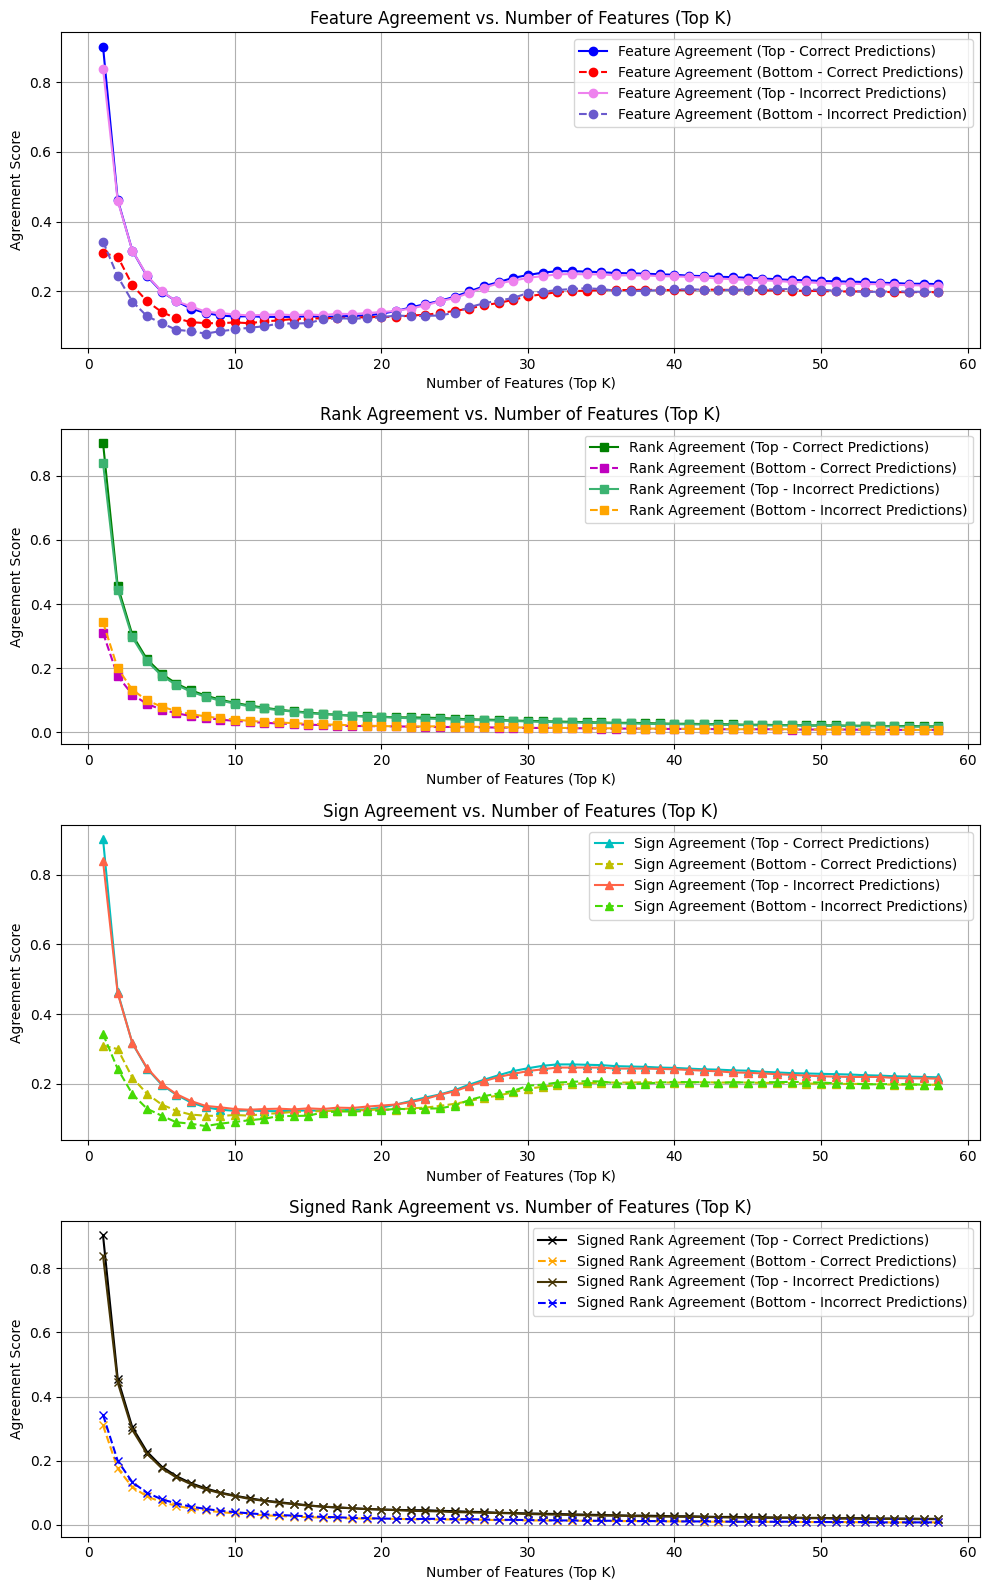

In [20]:
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct , disagreement_mean_across_bottom_correct, disagreement_mean_across_top_incorrect , disagreement_mean_across_bottom_incorrect, 58)

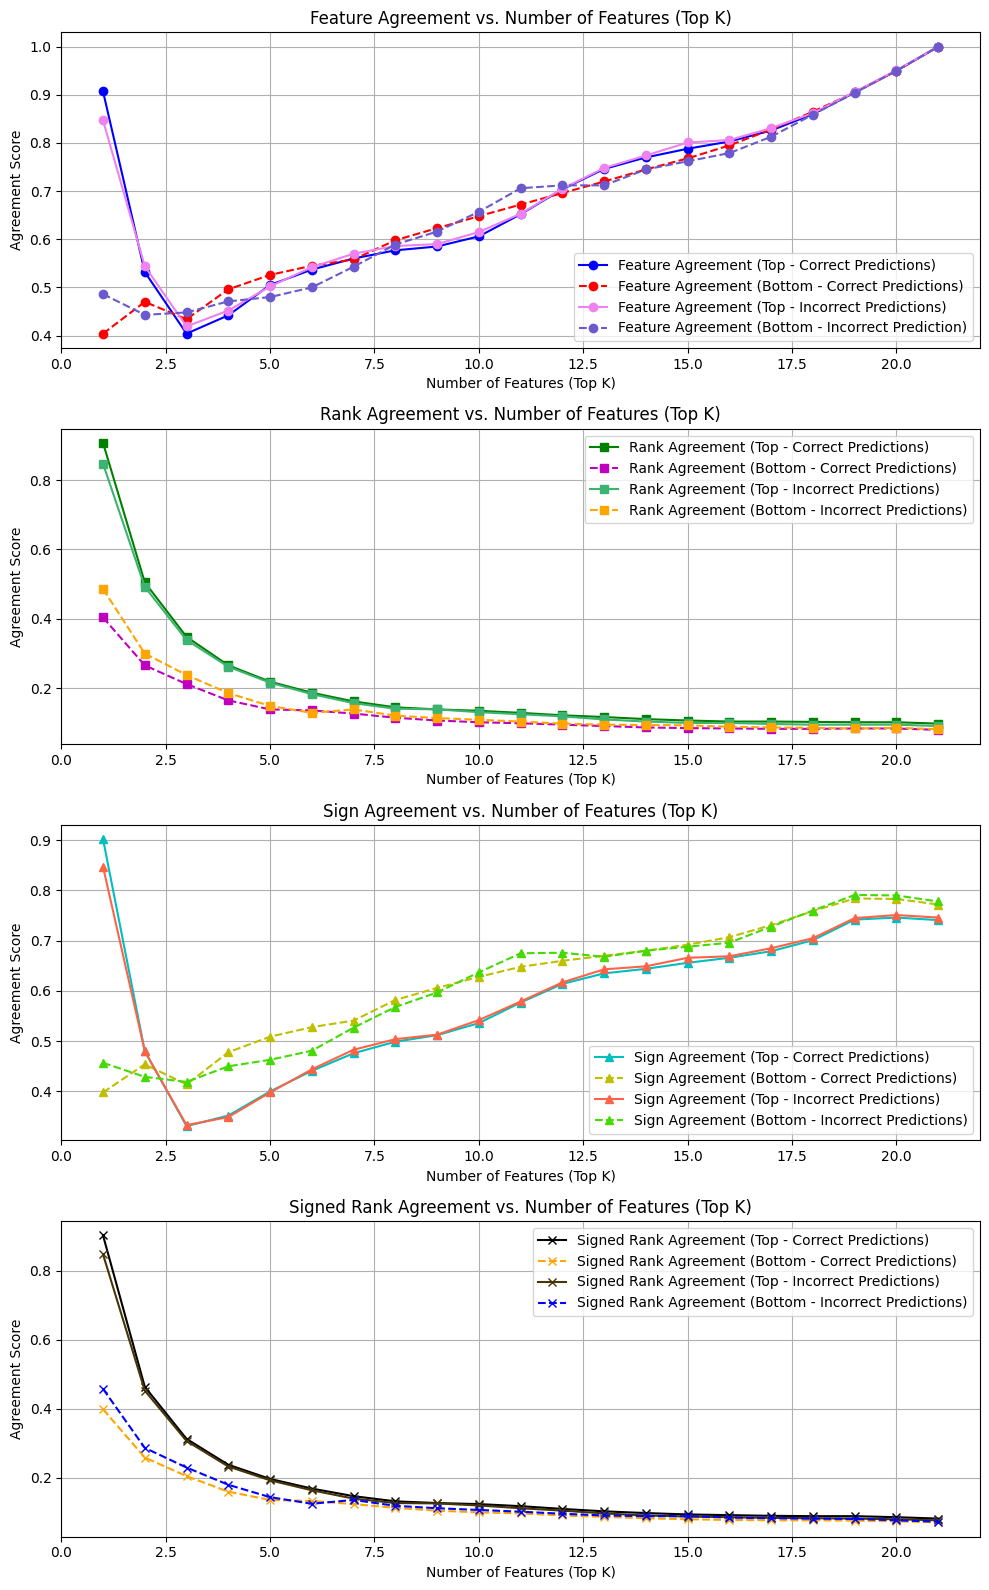

In [13]:
# For max compactor - top 21 features
disagreement_mean_across_top_correct_max , disagreement_mean_across_bottom_correct_max = disagreement_for_exp_dict(correct_predictions, 21, "max", processed)
disagreement_mean_across_top_incorrect_max , disagreement_mean_across_bottom_incorrect_max = disagreement_for_exp_dict(incorrect_predictions, 21, "max", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_max , disagreement_mean_across_bottom_correct_max, disagreement_mean_across_top_incorrect_max , disagreement_mean_across_bottom_incorrect_max, 21)

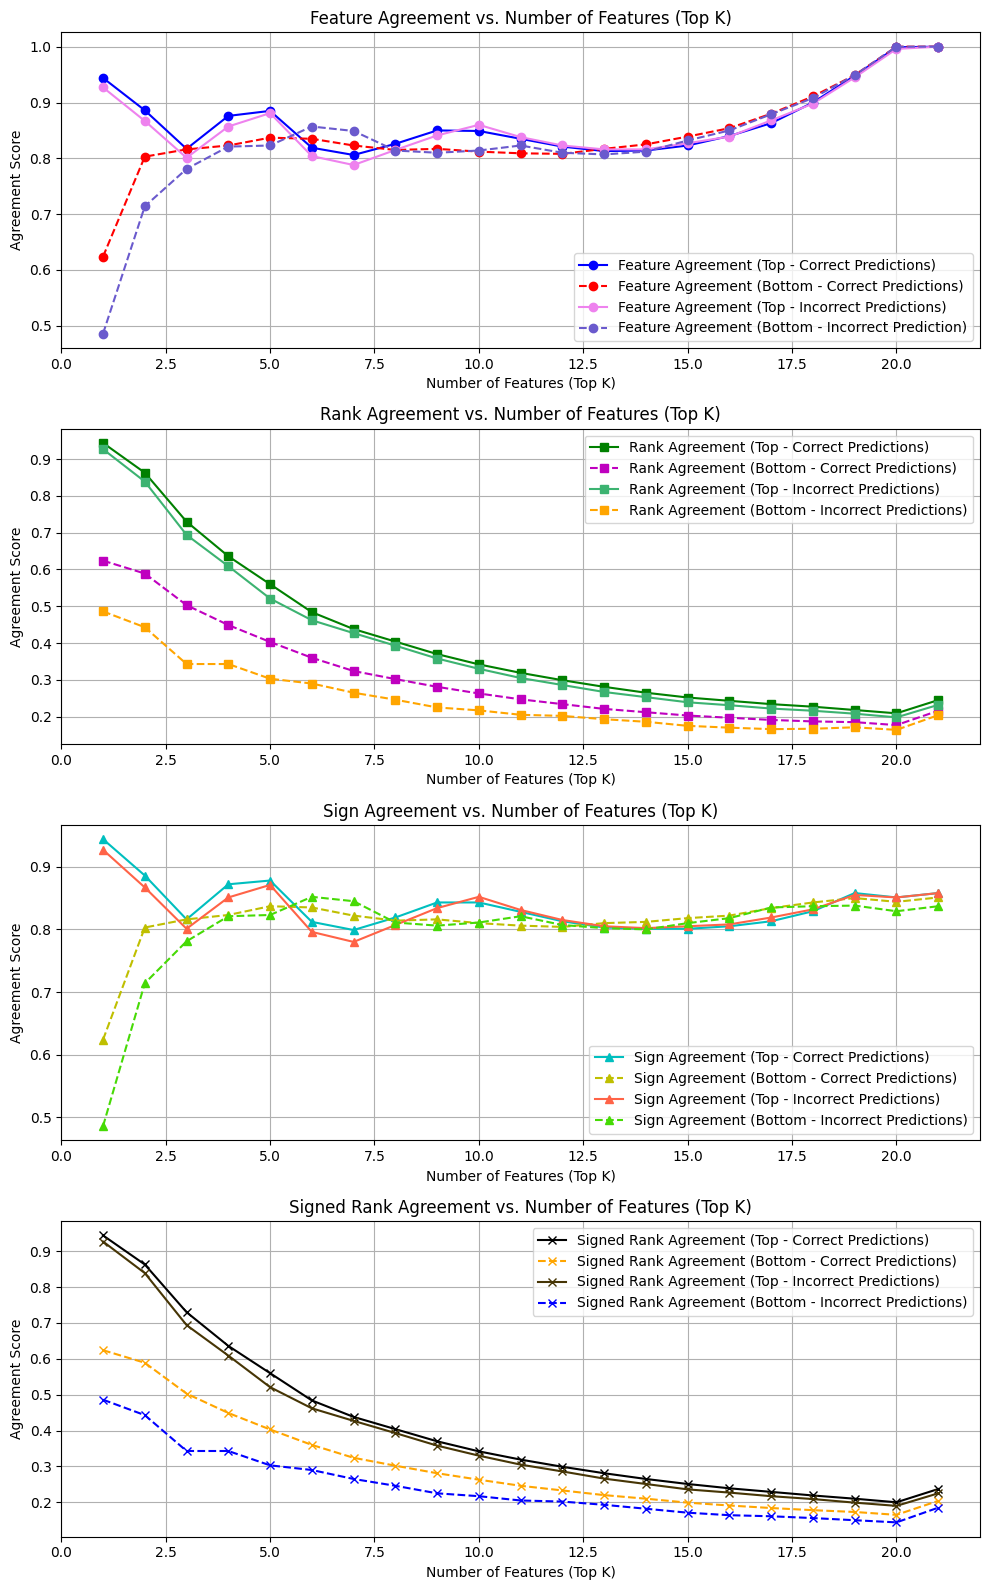

In [14]:
# For activated compactor - top 20 features
disagreement_mean_across_top_correct_act , disagreement_mean_across_bottom_correct_act = disagreement_for_exp_dict(correct_predictions, 21, "activated", processed)
disagreement_mean_across_top_incorrect_act , disagreement_mean_across_bottom_incorrect_act = disagreement_for_exp_dict(incorrect_predictions, 21, "activated", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_act , disagreement_mean_across_bottom_correct_act, disagreement_mean_across_top_incorrect_act , disagreement_mean_across_bottom_incorrect_act, 21)

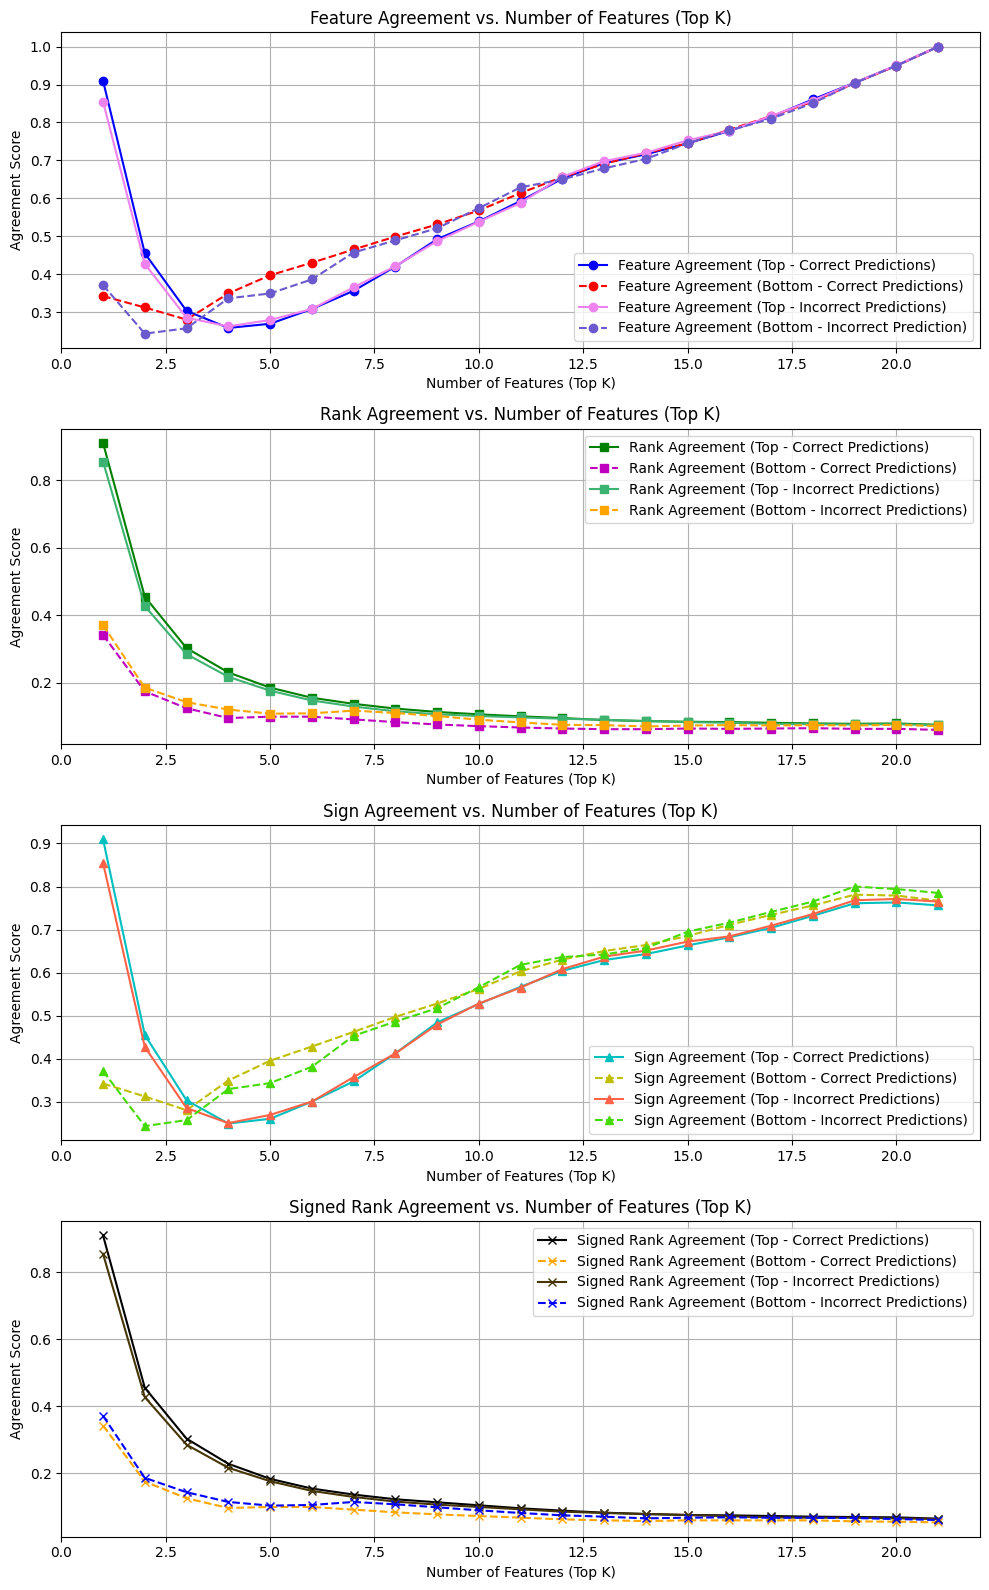

In [15]:
# For non-activated max compactor - top 20 features
disagreement_mean_across_top_correct_maxnonact , disagreement_mean_across_bottom_correct_maxnonact = disagreement_for_exp_dict(correct_predictions, 21, "maxnonactivated", processed)
disagreement_mean_across_top_incorrect_maxnonact , disagreement_mean_across_bottom_incorrect_maxnonact = disagreement_for_exp_dict(incorrect_predictions, 21, "maxnonactivated", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_maxnonact , disagreement_mean_across_bottom_correct_maxnonact, disagreement_mean_across_top_incorrect_maxnonact , disagreement_mean_across_bottom_incorrect_maxnonact, 21)

2. LIME vs global

In [13]:
# Function to load the pickle file and return the feature importances
def load_model_and_feat(pkl_model_path):
  # Load the model
  #model = pickle.load(open(pkl_model_path, 'rb'))
  with open(pkl_model_path, "rb") as file_handle:
    model = pickle.load(file_handle)
  # Load the feature importance array
  importance = model.feature_importances_
  # Get the feature names
  feat_names = model.feature_names_in_

  return importance, feat_names


# Function to select the top k features and plot
def select_top_features_and_plot(importance, feat_names, title):
  # Create df and sort
    df = pd.DataFrame({"Feature": feat_names, "Importance": importance})
    df_sorted = df.sort_values("Importance", ascending=False)

    # Plot
#     plt.cla()
#     plt.barh(df_sorted["Feature"], df_sorted['Importance'], label=title)
#     plt.show()

    return df_sorted

In [19]:
def disagreement_average_global_vs_local(global_exp: dict, local_exp: dict, k: int, features_F: list , method = None, raw_data = None, debug = False):
    
    disagreement_mean = {'feature_agreement': 0.0,
     'rank_agreement': 0.0,
     'sign_agreement': 0.0,
     'signed_rank_agreement': 0.0}
    
    for project_id in local_exp.keys():
        if debug:
            print(f"******************Project ID: {project_id}************************")
        
        if len(local_exp[project_id]) < k:
            raise ValueError(f"K should be less than {len(local_exp[project_id])}")
        
        disagreement_calc_2 = Disagreement(global_exp, local_exp[project_id])
        
        if debug:
            print("Initial Explanation 1 \n",disagreement_calc_2.sorted_explanation1[:k])
            print("Initial Explanation 2 \n",disagreement_calc_2.sorted_explanation2[:k])
            
        if method=="max":
            max_compactor = MaxCompactor(categorical_cols)
            disagreement_calc_2.compact_features(max_compactor)
            
        elif method == "activated" and raw_data is not None:
            activated_features = {}
            for feature in categorical_cols:
                activated_features[feature] = f"{feature}_{raw_data[raw_data['Project ID'] == project_id ][feature].values[0]}"
            activated_compactor = ActivatedCompactor(activated_features)
            disagreement_calc_2.compact_features(activated_compactor)
            
        elif method == "maxnonactivated" and raw_data is not None:
            activated_features = {}
            for feature in categorical_cols:
                activated_features[feature] = f"{feature}_{raw_data[raw_data['Project ID'] == project_id ][feature].values[0]}"
            max_non_activated_compactor = MaxNonActivatedCompactor(activated_features)
            disagreement_calc_2.compact_features(max_non_activated_compactor)
            
        if debug:
            print("After Compact Explanation 1 \n",disagreement_calc_2.sorted_explanation1[:k])
            print("After Compact Explanation 2 \n",disagreement_calc_2.sorted_explanation2[:k])
            
        disagreement = disagreement_calc_2.get_disagreement(k, features_F)
        
        if debug:
            print("Disagreement : ", disagreement)
        
        for key in list(disagreement_mean.keys()):
            if disagreement[key] == None:
                raise ValueError(f"The value for key '{key}' in disagreement_mean is None.")
            disagreement_mean[key] += disagreement[key]
        
        if debug:
            print("****************************************")

    for key in list(disagreement_mean.keys()):
        disagreement_mean[key] = round(disagreement_mean[key] / len(local_exp.keys()),3)
    
    if debug:
        print("*********************************************")
        print(disagreement_mean)
        print("*********************************************")

    
    return disagreement_mean

In [20]:
def disagreement_for_global_vs_local(global_exp, explanations, k_range, method=None, raw_data=None, debug=False):
    
    disagreement_mean_across_top = {'feature_agreement': [],
         'rank_agreement': [],
         'sign_agreement': [],
         'signed_rank_agreement': []}

    for i in range(1,k_range+1,1):
        explanations_global_vs_local = disagreement_average_global_vs_local(global_exp, explanations["top"], i, None, method, raw_data,  debug)

        for key in list(disagreement_mean_across_top.keys()):
            disagreement_mean_across_top[key].append(explanations_global_vs_local[key])

    disagreement_mean_across_bottom = {'feature_agreement': [],
         'rank_agreement': [],
         'sign_agreement': [],
         'signed_rank_agreement': []}

    for i in range(1,k_range+1,1):
        explanations_global_vs_local = disagreement_average_global_vs_local(global_exp, explanations["bottom"], i, None,method, raw_data, debug)

        for key in list(disagreement_mean_across_bottom.keys()):
            disagreement_mean_across_bottom[key].append(explanations_global_vs_local[key])

    return disagreement_mean_across_top, disagreement_mean_across_bottom


In [45]:
!pip install scikit-learn==1.2.2

In [17]:
# Load the pickle file and get global feature importance
global_importance, feat_names = load_model_and_feat(model_path)
print(global_importance)
global_explanation_plot = select_top_features_and_plot(global_importance, feat_names, "Fold one")
global_explanation_plot.values

[3.61000484e-02 2.59972053e-01 2.38932983e-02 3.65925642e-02
 4.09273999e-02 1.43449148e-02 6.23434576e-02 2.28542013e-03
 9.44354758e-02 6.87659534e-03 5.05636855e-02 1.38445586e-03
 2.51400872e-02 4.76777048e-03 1.88462059e-03 1.62638077e-03
 8.00286977e-04 4.04883136e-04 2.63697138e-04 8.12679251e-04
 5.28259431e-04 4.40797247e-04 6.59705333e-04 0.00000000e+00
 1.06799391e-03 1.03223494e-04 1.45426193e-05 2.26682129e-04
 8.64224050e-05 6.91804929e-05 3.43207484e-04 0.00000000e+00
 6.22417150e-04 4.55330641e-05 0.00000000e+00 4.58919562e-04
 2.35046294e-04 5.28531454e-04 2.30476796e-04 0.00000000e+00
 1.92891789e-03 2.48161773e-04 3.21397865e-05 5.62327971e-04
 1.95860687e-03 1.06183602e-03 1.27164498e-03 0.00000000e+00
 2.13978925e-03 5.83565412e-04 1.48677643e-04 4.47384205e-04
 8.18152591e-04 5.36978820e-04 8.28936721e-04 0.00000000e+00
 1.37420192e-03 3.04535252e-06 1.36462800e-05 4.21279728e-05
 1.11981950e-04 0.00000000e+00 9.99050899e-04 5.53649271e-05
 2.32792537e-04 0.000000

array([['Project Cost', 0.2599720532503212],
       ['School Success Rate', 0.09443547578970575],
       ['School City Success Rate', 0.06234345759559309],
       ...,
       ['Project Subject Subcategory Tree_Financial Literacy, Warmth, Care & Hunger',
        0.0],
       ['Project Subject Subcategory Tree_Foreign Languages, Gym & Fitness',
        0.0],
       ['Project Subject Subcategory Tree_Extracurricular, Nutrition Education',
        0.0]], dtype=object)

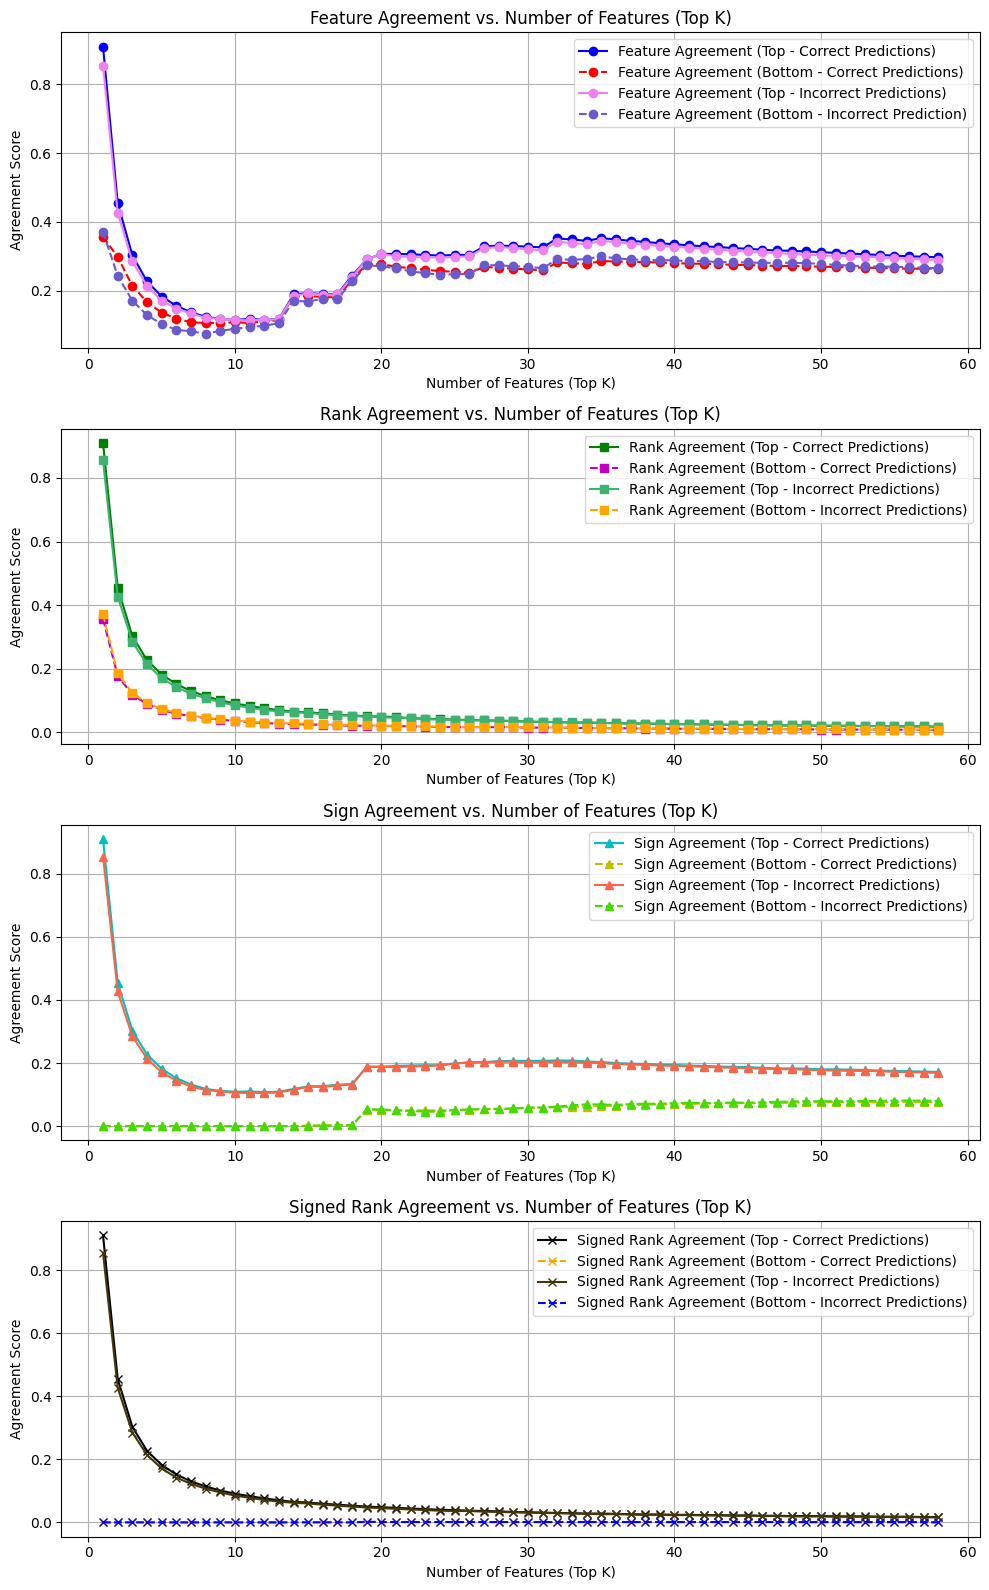

In [22]:
disagreement_mean_across_top_correct_gvl, disagreement_mean_across_bottom_correct_gvl = disagreement_for_global_vs_local(global_explanation_plot.values, correct_predictions["lime"], 58)
disagreement_mean_across_top_incorrect_gvl, disagreement_mean_across_bottom_incorrect_gvl = disagreement_for_global_vs_local(global_explanation_plot.values, incorrect_predictions["lime"], 58)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_gvl, disagreement_mean_across_bottom_correct_gvl, disagreement_mean_across_top_incorrect_gvl, disagreement_mean_across_bottom_incorrect_gvl, 58)

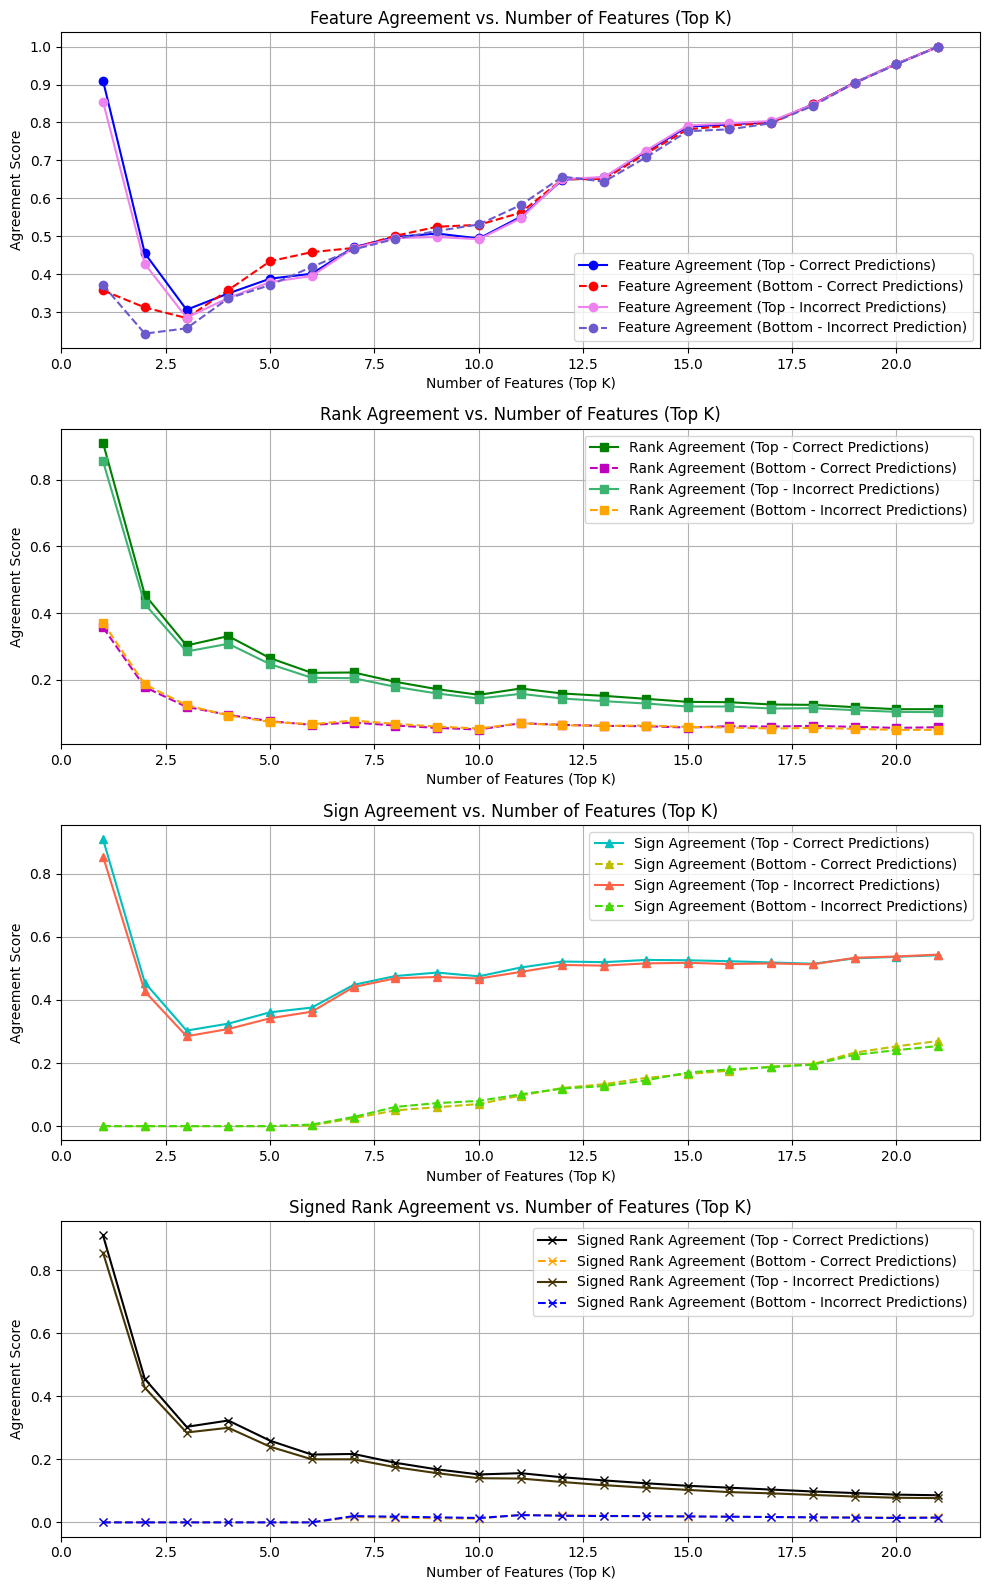

In [23]:
# For max compactor - top 20 features
disagreement_mean_across_top_correct_gvl_max, disagreement_mean_across_bottom_correct_gvl_max = disagreement_for_global_vs_local(global_explanation_plot.values, correct_predictions["lime"], 21, "max", processed)
disagreement_mean_across_top_incorrect_gvl_max, disagreement_mean_across_bottom_incorrect_gvl_max = disagreement_for_global_vs_local(global_explanation_plot.values, incorrect_predictions["lime"], 21, "max", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_gvl_max, disagreement_mean_across_bottom_correct_gvl_max, disagreement_mean_across_top_incorrect_gvl_max, disagreement_mean_across_bottom_incorrect_gvl_max, 21)

In [ ]:
# For activated compactor - top 20 features
disagreement_mean_across_top_correct_gvl_act, disagreement_mean_across_bottom_correct_gvl_act = disagreement_for_global_vs_local(global_explanation_plot.values, correct_predictions["lime"], 21, "activated", processed)
disagreement_mean_across_top_incorrect_gvl_act, disagreement_mean_across_bottom_incorrect_gvl_act = disagreement_for_global_vs_local(global_explanation_plot.values, incorrect_predictions["lime"], 21, "activated", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_gvl_act, disagreement_mean_across_bottom_correct_gvl_act, disagreement_mean_across_top_incorrect_gvl_act, disagreement_mean_across_bottom_incorrect_gvl_act, 21)

In [ ]:
# For max non-activated compactor - top 20 features
disagreement_mean_across_top_correct_gvl_maxnonact, disagreement_mean_across_bottom_correct_gvl_maxnonact = disagreement_for_global_vs_local(global_explanation_plot.values, correct_predictions["lime"], 21, "maxnonactivated", processed)
disagreement_mean_across_top_incorrect_gvl_maxnonact, disagreement_mean_across_bottom_incorrect_gvl_maxnonact = disagreement_for_global_vs_local(global_explanation_plot.values, incorrect_predictions["lime"], 21, "maxnonactivated", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_gvl_maxnonact, disagreement_mean_across_bottom_correct_gvl_maxnonact, disagreement_mean_across_top_incorrect_gvl_maxnonact, disagreement_mean_across_bottom_incorrect_gvl_maxnonact, 21)

3. SHAP vs global

In [ ]:
disagreement_mean_across_top_correct_gvs, disagreement_mean_across_bottom_correct_gvs = disagreement_for_global_vs_local(global_explanation_plot.values, correct_predictions["treeshap"], 58)
disagreement_mean_across_top_incorrect_gvs, disagreement_mean_across_bottom_incorrect_gvs = disagreement_for_global_vs_local(global_explanation_plot.values, incorrect_predictions["treeshap"], 58)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_gvs, disagreement_mean_across_bottom_correct_gvs, disagreement_mean_across_top_incorrect_gvs, disagreement_mean_across_bottom_incorrect_gvs, 58)

In [ ]:
# For max compactor - top 20 features
disagreement_mean_across_top_correct_gvs_max, disagreement_mean_across_bottom_correct_gvs_max = disagreement_for_global_vs_local(global_explanation_plot.values, correct_predictions["treeshap"], 21, "max", processed)
disagreement_mean_across_top_incorrect_gvs_max, disagreement_mean_across_bottom_incorrect_gvs_max = disagreement_for_global_vs_local(global_explanation_plot.values, incorrect_predictions["treeshap"], 21, "max", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_gvs_max, disagreement_mean_across_bottom_correct_gvs_max, disagreement_mean_across_top_incorrect_gvs_max, disagreement_mean_across_bottom_incorrect_gvs_max, 21)

In [ ]:
# For activated compactor - top 20 features
disagreement_mean_across_top_correct_gvs_act, disagreement_mean_across_bottom_correct_gvs_act = disagreement_for_global_vs_local(global_explanation_plot.values, correct_predictions["treeshap"], 21, "activated", processed)
disagreement_mean_across_top_incorrect_gvs_act, disagreement_mean_across_bottom_incorrect_gvs_act = disagreement_for_global_vs_local(global_explanation_plot.values, incorrect_predictions["treeshap"], 21, "activated", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_gvs_act, disagreement_mean_across_bottom_correct_gvs_act, disagreement_mean_across_top_incorrect_gvs_act, disagreement_mean_across_bottom_incorrect_gvs_act, 21)

In [ ]:
# For max non-activated compactor - top 20 features
disagreement_mean_across_top_correct_gvs_maxnonact, disagreement_mean_across_bottom_correct_gvs_maxnonact = disagreement_for_global_vs_local(global_explanation_plot.values, correct_predictions["treeshap"], 21, "maxnonactivated", processed)
disagreement_mean_across_top_incorrect_gvs_maxnonact, disagreement_mean_across_bottom_incorrect_gvs_maxnonact = disagreement_for_global_vs_local(global_explanation_plot.values, incorrect_predictions["treeshap"], 21, "maxnonactivated", processed)
plot_average_accross_n_projects_various_k_features(disagreement_mean_across_top_correct_gvs_maxnonact, disagreement_mean_across_bottom_correct_gvs_maxnonact, disagreement_mean_across_top_incorrect_gvs_maxnonact, disagreement_mean_across_bottom_incorrect_gvs_maxnonact, 21)